In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [14]:
HPSDF = pd.read_csv('COVID_HPS.csv', index_col = 0)
HPSDF.head()

,State,cases,deaths,Personal Health Care Expenses Per State (2014),Hospital Services Expenses Per State (2014),Physician and Clinical Services Expenses Per State (2014),Other Professional Services Expenses Per State (2014),Home Health Care Expenses Per State (2014),Drugs and Non-Durables Expenses Per State (2014),Durables Expenses Per State (2014),Other Health Care Expenses Per State (2014),Total Health Care Expenses Per State (2014)
0,Alabama,387786,14345,35263,12715,8423,826,980,6816,686,1569,19300
1,Alaska,18316,367,8151,3473,2481,342,144,471,102,587,4127
2,Arizona,426614,18857,43356,15707,11922,1666,913,5467,1173,2332,23473
3,Arkansas,161569,3301,21980,7930,4851,776,538,3470,308,1885,11828
4,California,2664110,102387,291989,106487,76688,8376,11253,36924,3740,19164,156145


In [15]:
HPSDF = HPSDF.drop(columns = ['cases', 'deaths'])
HPSDF.head()

,State,Personal Health Care Expenses Per State (2014),Hospital Services Expenses Per State (2014),Physician and Clinical Services Expenses Per State (2014),Other Professional Services Expenses Per State (2014),Home Health Care Expenses Per State (2014),Drugs and Non-Durables Expenses Per State (2014),Durables Expenses Per State (2014),Other Health Care Expenses Per State (2014),Total Health Care Expenses Per State (2014)
0,Alabama,35263,12715,8423,826,980,6816,686,1569,19300
1,Alaska,8151,3473,2481,342,144,471,102,587,4127
2,Arizona,43356,15707,11922,1666,913,5467,1173,2332,23473
3,Arkansas,21980,7930,4851,776,538,3470,308,1885,11828
4,California,291989,106487,76688,8376,11253,36924,3740,19164,156145


In [16]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [17]:
HPSDF = pd.merge(HPSDF, COVID, how = 'left', on = 'State')
HPSDF.head()

,State,Personal Health Care Expenses Per State (2014),Hospital Services Expenses Per State (2014),Physician and Clinical Services Expenses Per State (2014),Other Professional Services Expenses Per State (2014),Home Health Care Expenses Per State (2014),Drugs and Non-Durables Expenses Per State (2014),Durables Expenses Per State (2014),Other Health Care Expenses Per State (2014),Total Health Care Expenses Per State (2014),cases,deaths
0,Alabama,35263,12715,8423,826,980,6816,686,1569,19300,26912,785
1,Alaska,8151,3473,2481,342,144,471,102,587,4127,751,10
2,Arizona,43356,15707,11922,1666,913,5467,1173,2332,23473,39298,1228
3,Arkansas,21980,7930,4851,776,538,3470,308,1885,11828,13191,188
4,California,291989,106487,76688,8376,11253,36924,3740,19164,156145,159098,5202


In [18]:
HPSDF.shape

(51, 12)

In [19]:
HPSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   State                                                      51 non-null     object
 1   Personal Health Care Expenses Per State (2014)             51 non-null     int64 
 2   Hospital Services Expenses Per State (2014)                51 non-null     int64 
 3   Physician and Clinical Services Expenses Per State (2014)  51 non-null     int64 
 4   Other Professional Services Expenses Per State (2014)      51 non-null     int64 
 5   Home Health Care Expenses Per State (2014)                 51 non-null     int64 
 6   Drugs and Non-Durables Expenses Per State (2014)           51 non-null     int64 
 7   Durables Expenses Per State (2014)                         51 non-null     int64 
 8   Other Health Care Expe

In [20]:
HPSDF.isnull().sum()

State                                                        0
Personal Health Care Expenses Per State (2014)               0
Hospital Services Expenses Per State (2014)                  0
Physician and Clinical Services Expenses Per State (2014)    0
Other Professional Services Expenses Per State (2014)        0
Home Health Care Expenses Per State (2014)                   0
Drugs and Non-Durables Expenses Per State (2014)             0
Durables Expenses Per State (2014)                           0
Other Health Care Expenses Per State (2014)                  0
Total Health Care Expenses Per State (2014)                  0
cases                                                        0
deaths                                                       0
dtype: int64

In [21]:
HPSDF.describe()

,Personal Health Care Expenses Per State (2014),Hospital Services Expenses Per State (2014),Physician and Clinical Services Expenses Per State (2014),Other Professional Services Expenses Per State (2014),Home Health Care Expenses Per State (2014),Drugs and Non-Durables Expenses Per State (2014),Durables Expenses Per State (2014),Other Health Care Expenses Per State (2014),Total Health Care Expenses Per State (2014),cases,deaths
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,50251.470588,19234.549020,11708.607843,1623.960784,1638.549020,6956.509804,914.156863,2969.686275,25811.470588,41994.235294,2290.549020
std,55908.884066,20625.051627,13823.875643,1740.382854,2314.186469,7806.826342,1005.030654,3817.010660,29831.893442,63513.183767,4748.588326
min,4856.000000,2335.000000,1034.000000,147.000000,45.000000,438.000000,75.000000,243.000000,2055.000000,614.000000,10.000000
25%,13884.500000,5914.500000,3133.000000,466.000000,351.500000,1648.000000,281.000000,767.000000,6683.500000,9231.500000,212.000000
50%,35299.000000,12715.000000,7852.000000,1008.000000,913.000000,5206.000000,513.000000,1914.000000,17749.000000,20152.000000,704.000000
75%,59333.000000,23624.500000,14921.000000,1951.000000,1523.000000,8198.500000,1136.500000,2858.000000,29527.500000,46961.500000,2469.500000
max,291989.000000,106487.000000,76688.000000,8376.000000,11253.000000,36924.000000,5025.000000,19164.000000,156145.000000,389349.000000,30683.000000


In [22]:
corr = HPSDF.corr()
corr

,Personal Health Care Expenses Per State (2014),Hospital Services Expenses Per State (2014),Physician and Clinical Services Expenses Per State (2014),Other Professional Services Expenses Per State (2014),Home Health Care Expenses Per State (2014),Drugs and Non-Durables Expenses Per State (2014),Durables Expenses Per State (2014),Other Health Care Expenses Per State (2014),Total Health Care Expenses Per State (2014),cases,deaths
Personal Health Care Expenses Per State (2014),1.000000,0.996786,0.988609,0.984908,0.965372,0.989288,0.903460,0.926640,0.998353,0.754603,0.573237
Hospital Services Expenses Per State (2014),0.996786,1.000000,0.979458,0.977592,0.959492,0.982849,0.891519,0.924660,0.990889,0.747165,0.566382
Physician and Clinical Services Expenses Per State (2014),0.988609,0.979458,1.000000,0.978159,0.940111,0.974620,0.906791,0.880382,0.991634,0.686015,0.483806
Other Professional Services Expenses Per State (2014),0.984908,0.977592,0.978159,1.000000,0.936800,0.975466,0.928467,0.892384,0.985018,0.765562,0.588659
Home Health Care Expenses Per State (2014),0.965372,0.959492,0.940111,0.936800,1.000000,0.955953,0.857952,0.940239,0.967243,0.797151,0.643582
Drugs and Non-Durables Expenses Per State (2014),0.989288,0.982849,0.974620,0.975466,0.955953,1.000000,0.915753,0.905114,0.991053,0.763679,0.587858
Durables Expenses Per State (2014),0.903460,0.891519,0.906791,0.928467,0.857952,0.915753,1.000000,0.734207,0.908201,0.645499,0.488299
Other Health Care Expenses Per State (2014),0.926640,0.924660,0.880382,0.892384,0.940239,0.905114,0.734207,1.000000,0.922511,0.846169,0.724226
Total Health Care Expenses Per State (2014),0.998353,0.990889,0.991634,0.985018,0.967243,0.991053,0.908201,0.922511,1.000000,0.754260,0.571414
cases,0.754603,0.747165,0.686015,0.765562,0.797151,0.763679,0.645499,0.846169,0.754260,1.000000,0.957358


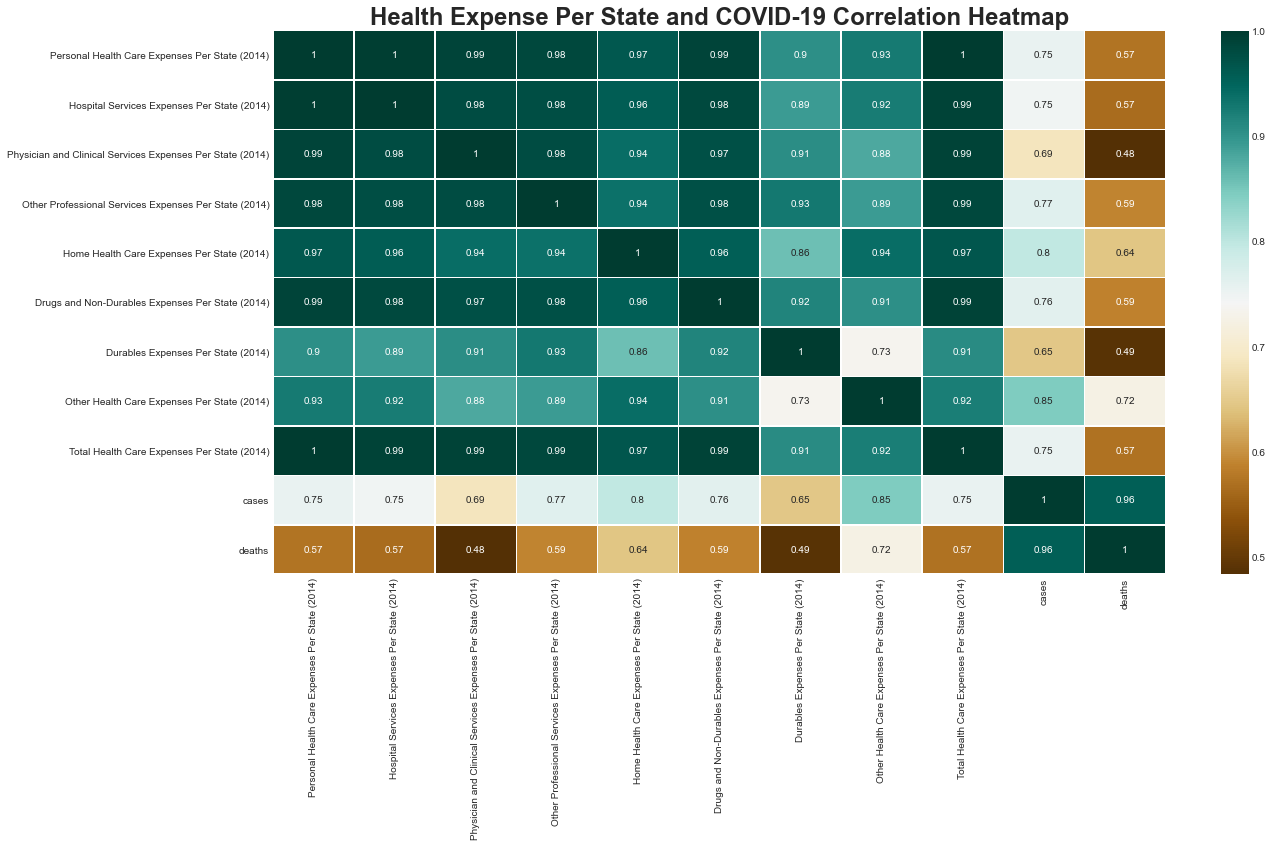

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Expense Per State and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24);

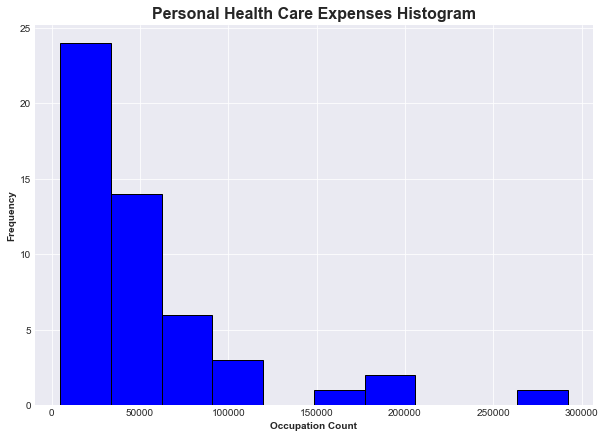

In [24]:
HPSDF['Personal Health Care Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Personal Health Care Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

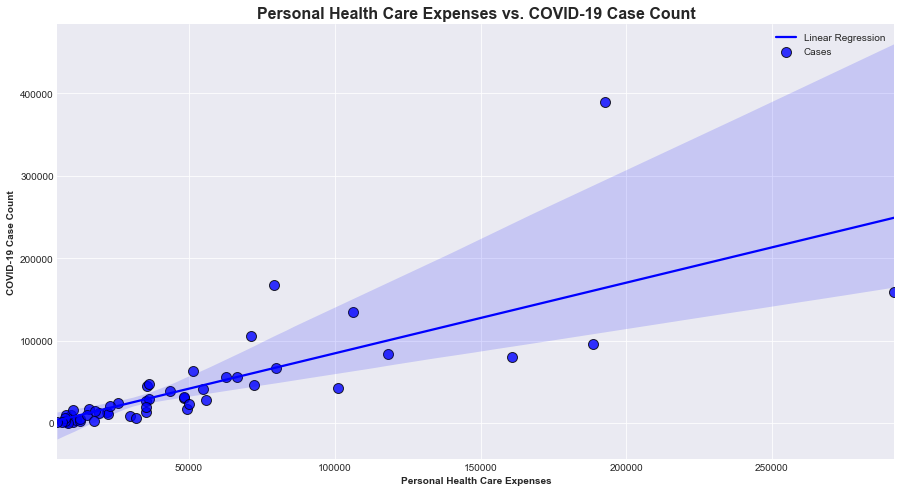

In [25]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Personal Health Care Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Personal Health Care Expenses vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Personal Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [26]:
spearmanr(HPSDF['cases'], HPSDF['Personal Health Care Expenses Per State (2014)'])

SpearmanrResult(correlation=0.9161990950226245, pvalue=4.269830891931673e-21)

In [27]:
model1 = sm.OLS(HPSDF['cases'], HPSDF['Personal Health Care Expenses Per State (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              117.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    9.45e-15
Time:                        16:20:35   Log-Likelihood:                         -614.39
No. Observations:                  51   AIC:                                      1231.
Df Residuals:                      50   BIC:                                      1233.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State (2014)     0.8475      0.078     10.856      0.000       0.691       1.004
==============================================================================
Omnibus:                       65.397   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.176
Skew:                           3.244   Prob(JB):                    7.98e-141
Kurtosis:                      19.171   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

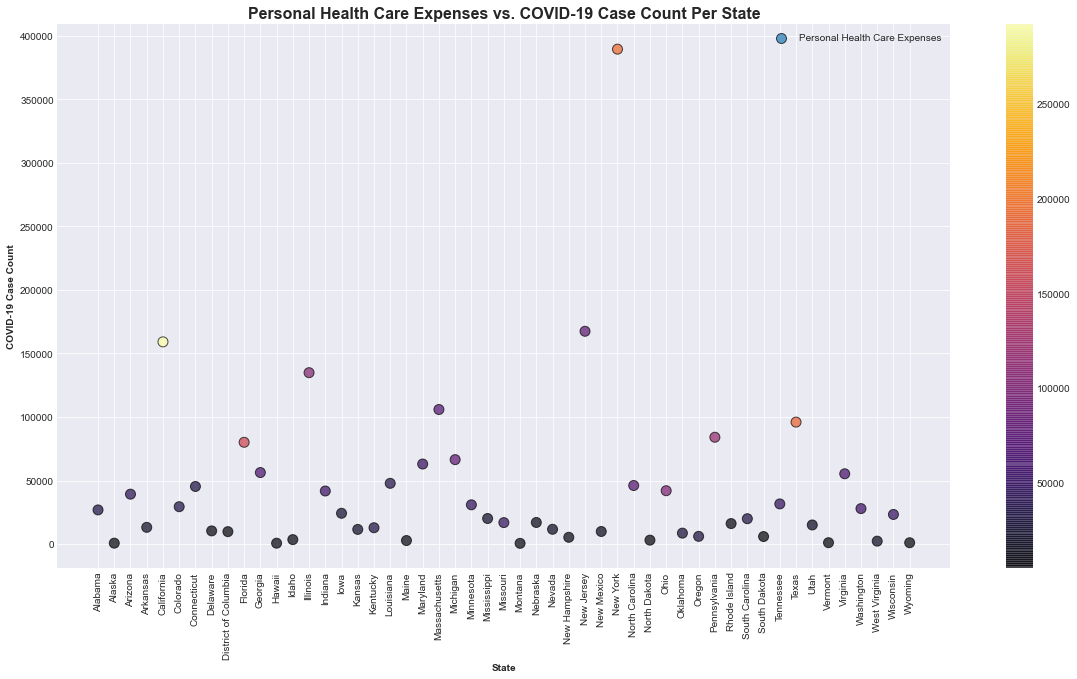

In [28]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Personal Health Care Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Personal Health Care Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Personal Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

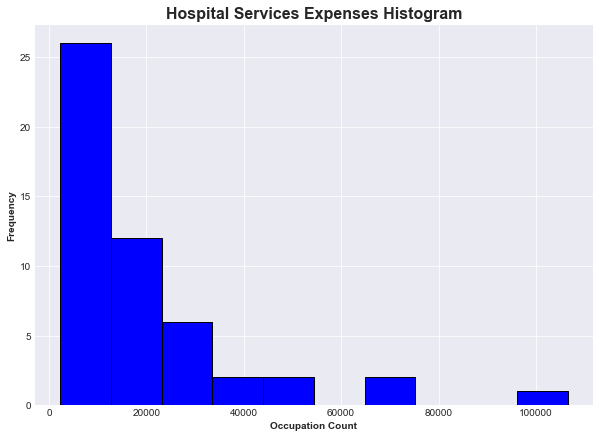

In [29]:
HPSDF['Hospital Services Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Hospital Services Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

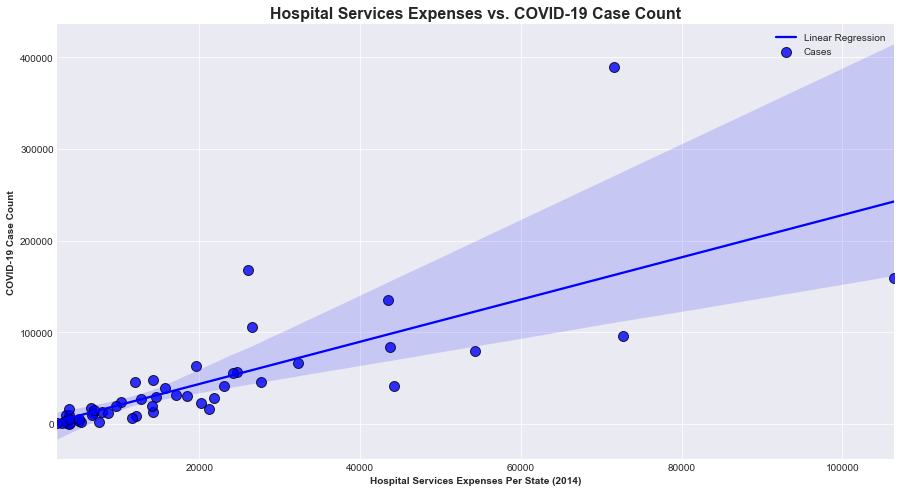

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Hospital Services Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Hospital Services Expenses vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hospital Services Expenses Per State (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [31]:
spearmanr(HPSDF['cases'], HPSDF['Hospital Services Expenses Per State (2014)'])

SpearmanrResult(correlation=0.899366515837104, pvalue=3.103170947381761e-19)

In [32]:
model2 = sm.OLS(HPSDF['cases'], HPSDF['Hospital Services Expenses Per State (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              113.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.86e-14
Time:                        16:20:36   Log-Likelihood:                         -615.08
No. Observations:                  51   AIC:                                      1232.
Df Residuals:                      50   BIC:                                      1234.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Hospital Services Expenses Per State (2014)     2.2456      0.211     10.649      0.000       1.822       2.669
==============================================================================
Omnibus:                       66.919   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.852
Skew:                           3.366   Prob(JB):                    1.91e-144
Kurtosis:                      19.314   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

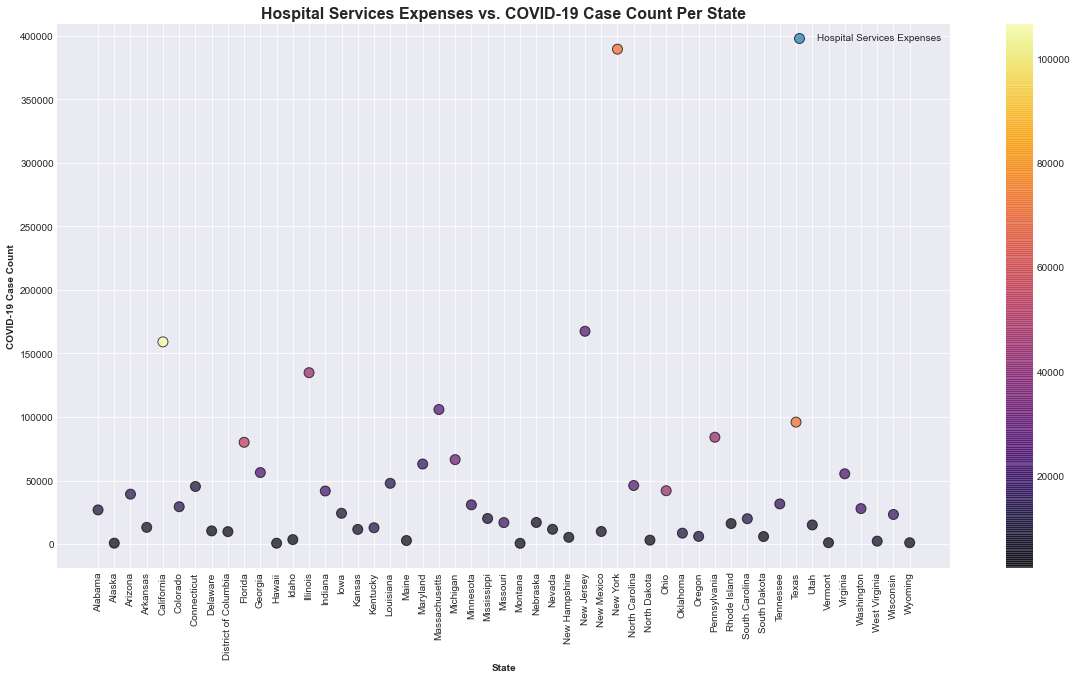

In [33]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Hospital Services Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Hospital Services Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Hospital Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

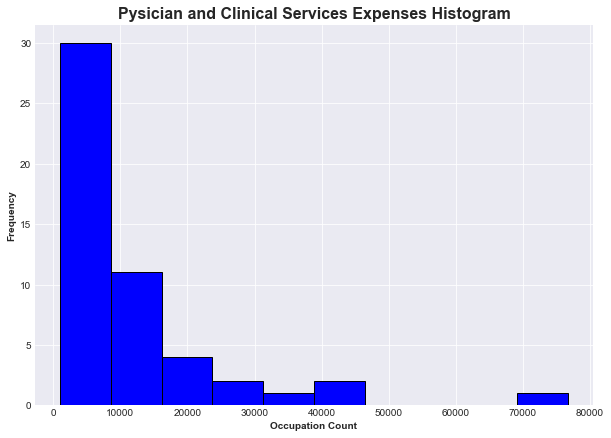

In [34]:
HPSDF['Physician and Clinical Services Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Pysician and Clinical Services Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

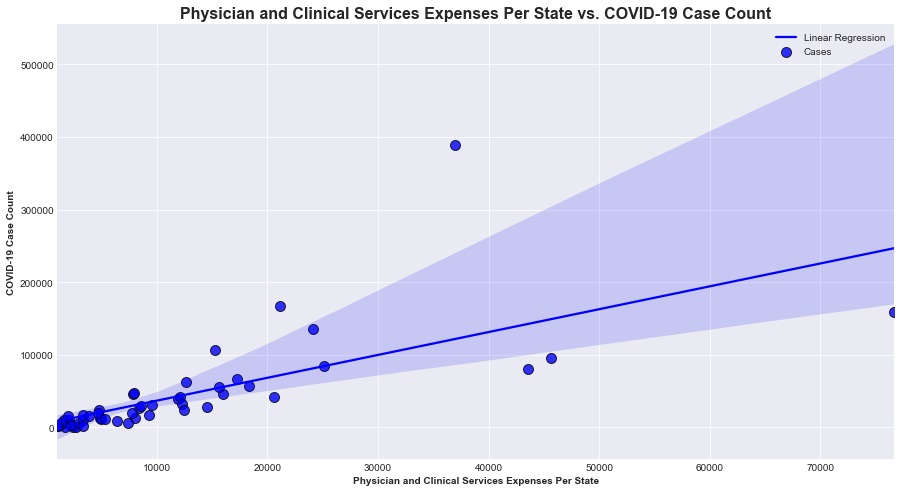

In [35]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Physician and Clinical Services Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Physician and Clinical Services Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Physician and Clinical Services Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [36]:
spearmanr(HPSDF['cases'], HPSDF['Physician and Clinical Services Expenses Per State (2014)'])

SpearmanrResult(correlation=0.9039819004524887, pvalue=1.0374596607142662e-19)

In [37]:
model3 = sm.OLS(HPSDF['cases'], HPSDF['Physician and Clinical Services Expenses Per State (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              85.60
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.06e-12
Time:                        16:20:37   Log-Likelihood:                         -619.83
No. Observations:                  51   AIC:                                      1242.
Df Residuals:                      50   BIC:                                      1244.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Physician and Clinical Services Expenses Per State (2014)     3.3356      0.361      9.252      0.000       2.611       4.060
==============================================================================
Omnibus:                       72.052   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.398
Skew:                           3.617   Prob(JB):                    1.51e-197
Kurtosis:                      22.344   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

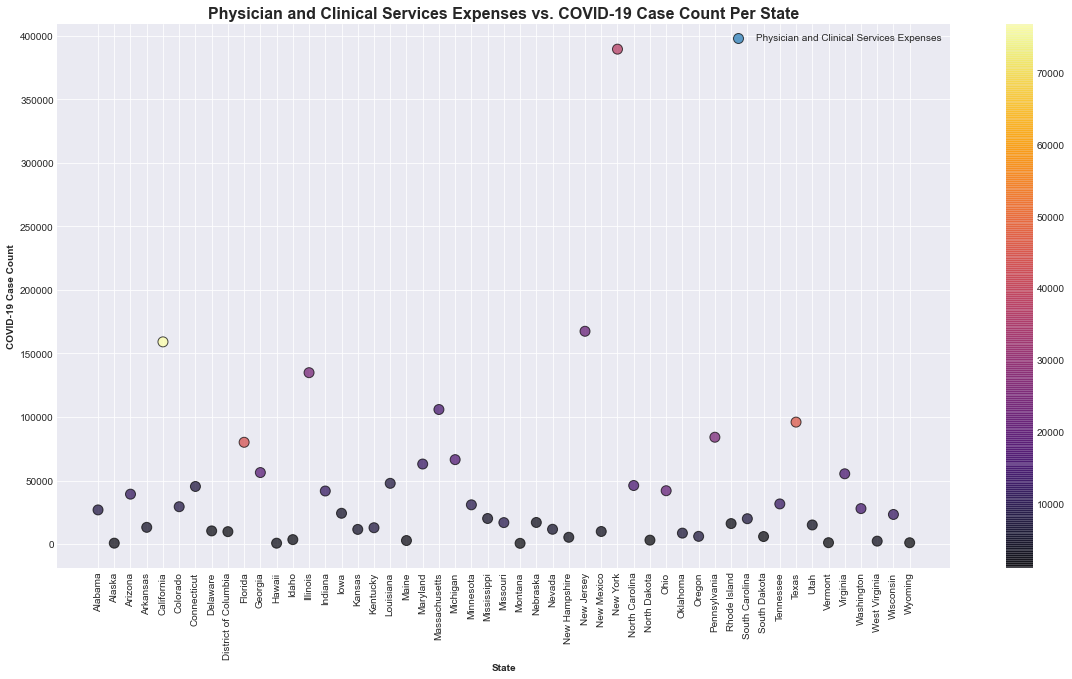

In [38]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Physician and Clinical Services Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Physician and Clinical Services Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Physician and Clinical Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

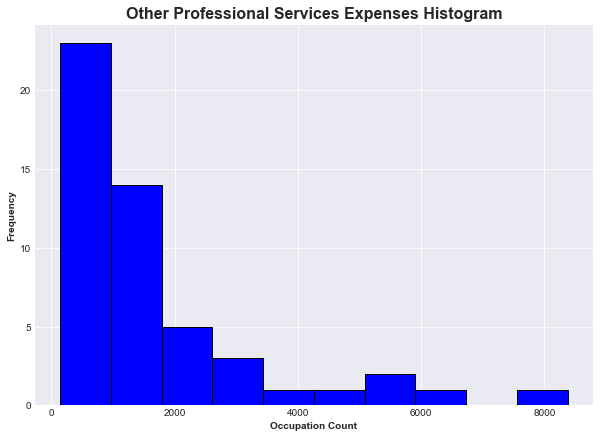

In [39]:
HPSDF['Other Professional Services Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Other Professional Services Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');


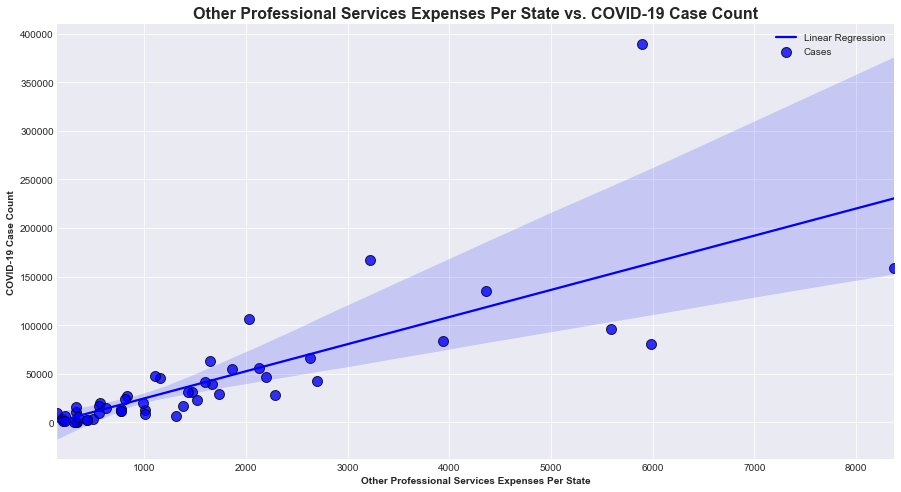

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Professional Services Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Professional Services Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Professional Services Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
spearmanr(HPSDF['cases'], HPSDF['Other Professional Services Expenses Per State (2014)'])

SpearmanrResult(correlation=0.8977126181622967, pvalue=4.536772626541306e-19)

In [42]:
model4 = sm.OLS(HPSDF['cases'], HPSDF['Other Professional Services Expenses Per State (2014)']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              124.0
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    3.80e-15
Time:                        16:20:38   Log-Likelihood:                         -613.47
No. Observations:                  51   AIC:                                      1229.
Df Residuals:                      50   BIC:                                      1231.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Other Professional Services Expenses Per State (2014)    26.9603      2.421     11.136      0.000      22.098      31.823
==============================================================================
Omnibus:                       71.865   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.963
Skew:                           3.614   Prob(JB):                    9.21e-194
Kurtosis:                      22.134   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

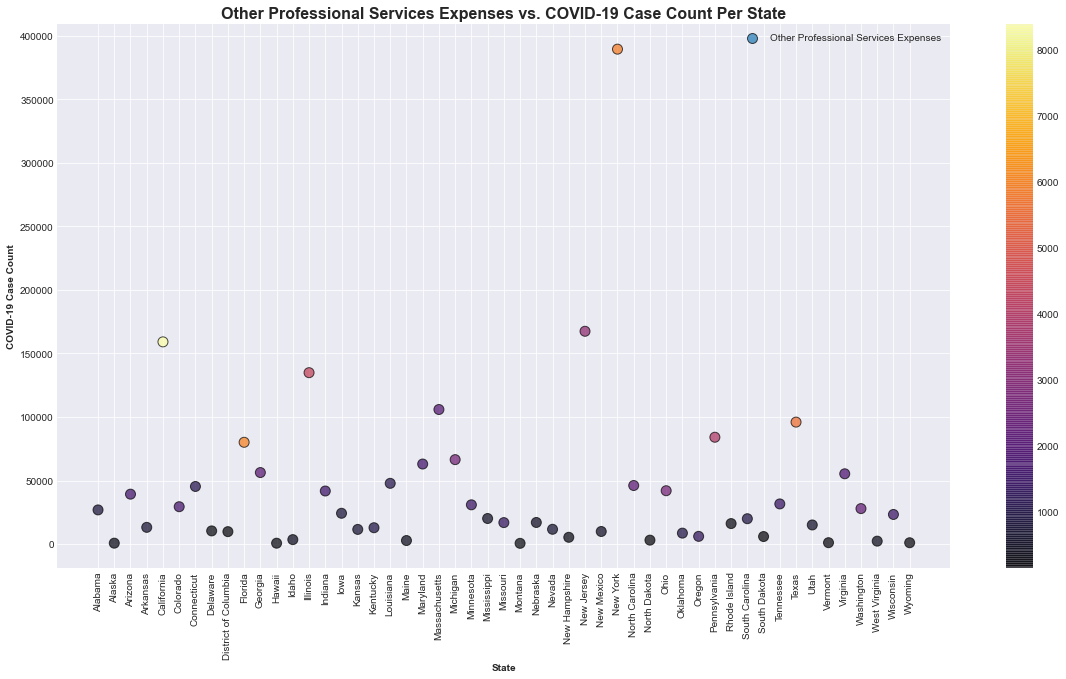

In [43]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Other Professional Services Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Other Professional Services Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Professional Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

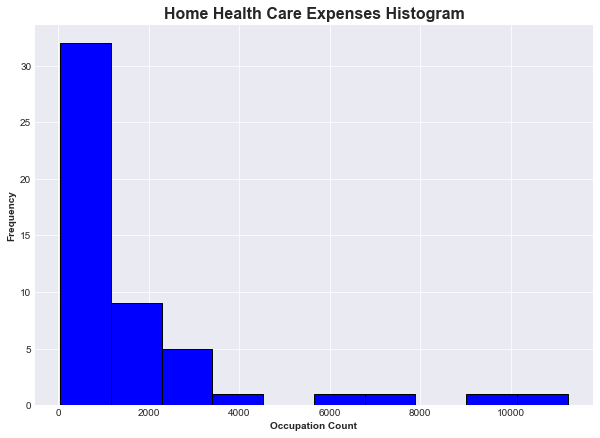

In [44]:
HPSDF['Home Health Care Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Home Health Care Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

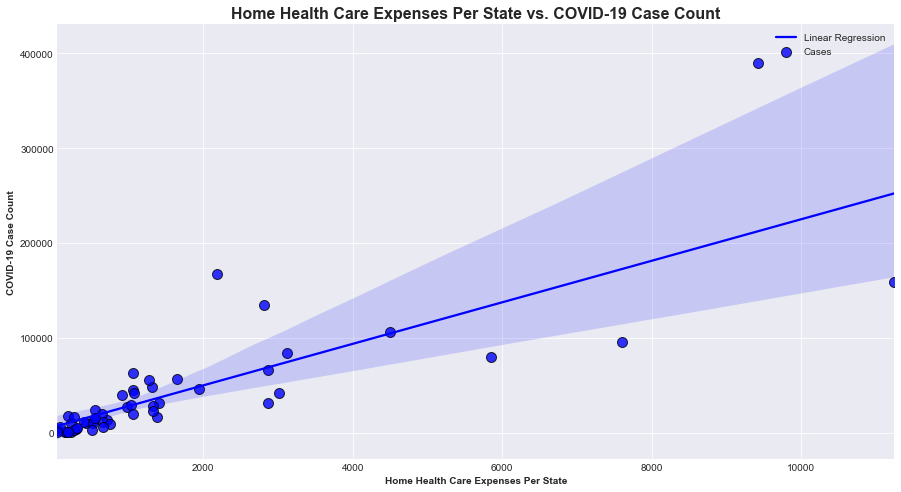

In [45]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Home Health Care Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Home Health Care Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Home Health Care Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [46]:
spearmanr(HPSDF['cases'], HPSDF['Home Health Care Expenses Per State (2014)'])

SpearmanrResult(correlation=0.8941378766513927, pvalue=1.0088794504291516e-18)

In [47]:
model5 = sm.OLS(HPSDF['cases'], HPSDF['Home Health Care Expenses Per State (2014)']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              144.9
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.18e-16
Time:                        16:20:39   Log-Likelihood:                         -610.58
No. Observations:                  51   AIC:                                      1223.
Df Residuals:                      50   BIC:                                      1225.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Home Health Care Expenses Per State (2014)    23.1470      1.923     12.039      0.000      19.285      27.009
==============================================================================
Omnibus:                       34.078   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.036
Skew:                           1.552   Prob(JB):                     7.15e-33
Kurtosis:                      10.748   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

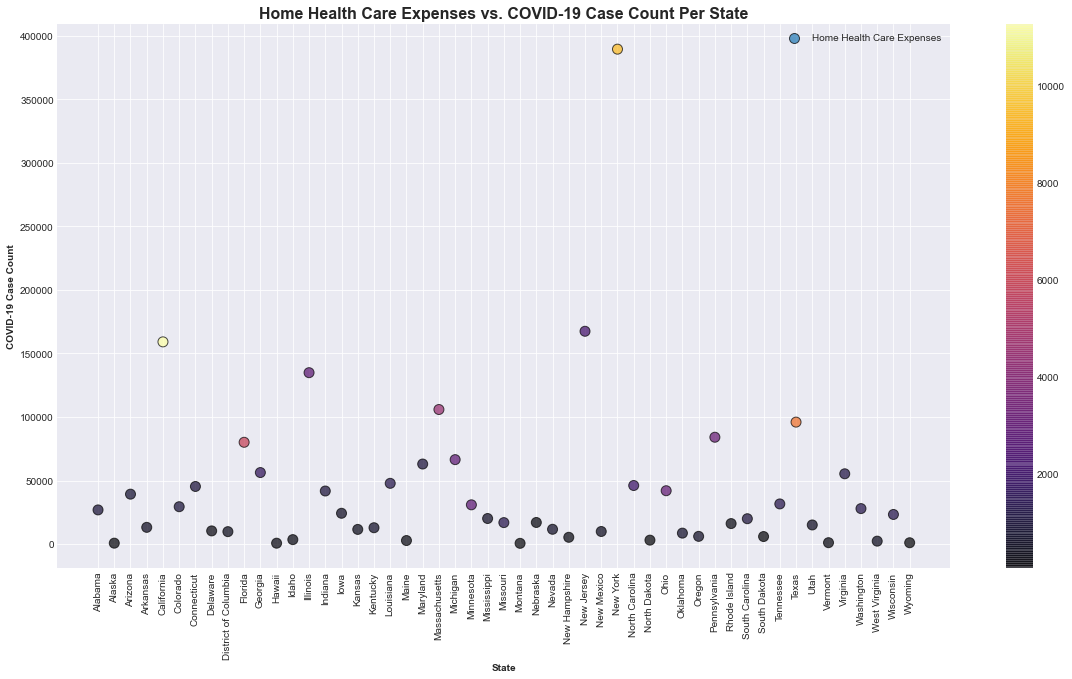

In [48]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Home Health Care Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Home Health Care Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Home Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

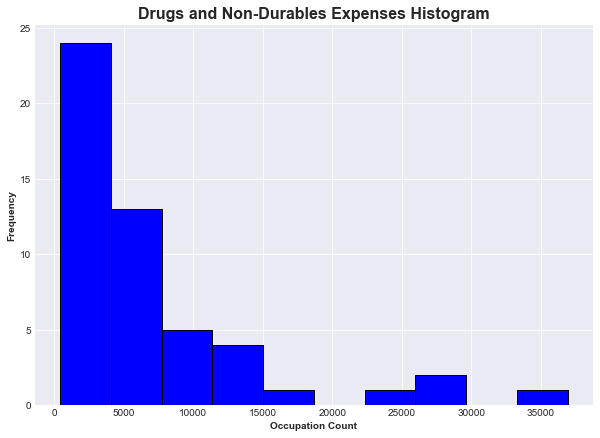

In [49]:
HPSDF['Drugs and Non-Durables Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Drugs and Non-Durables Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

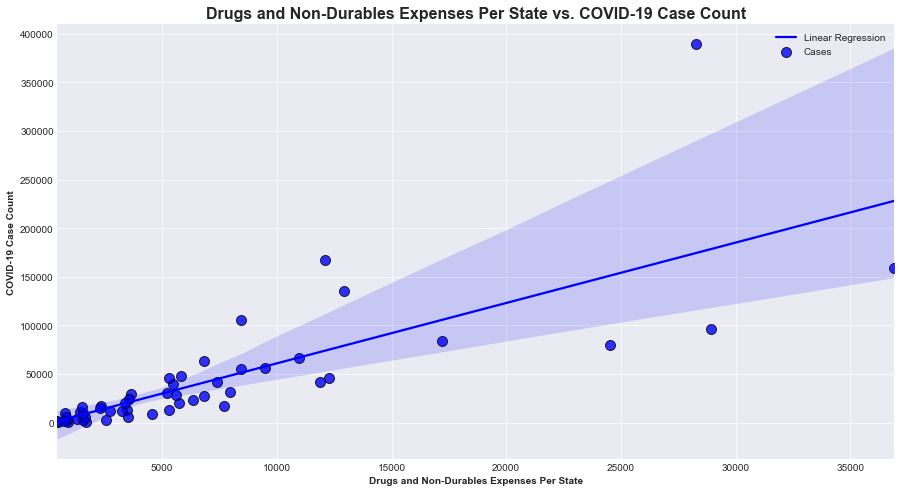

In [50]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Drugs and Non-Durables Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Drugs and Non-Durables Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Drugs and Non-Durables Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [51]:
spearmanr(HPSDF['cases'], HPSDF['Drugs and Non-Durables Expenses Per State (2014)'])

SpearmanrResult(correlation=0.9089592760180994, pvalue=2.9860769340886156e-20)

In [52]:
model6 = sm.OLS(HPSDF['cases'], HPSDF['Drugs and Non-Durables Expenses Per State (2014)']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              123.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    4.18e-15
Time:                        16:20:40   Log-Likelihood:                         -613.57
No. Observations:                  51   AIC:                                      1229.
Df Residuals:                      50   BIC:                                      1231.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Drugs and Non-Durables Expenses Per State (2014)     6.1341      0.552     11.107      0.000       5.025       7.243
==============================================================================
Omnibus:                       60.068   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.856
Skew:                           2.944   Prob(JB):                    1.74e-109
Kurtosis:                      17.179   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

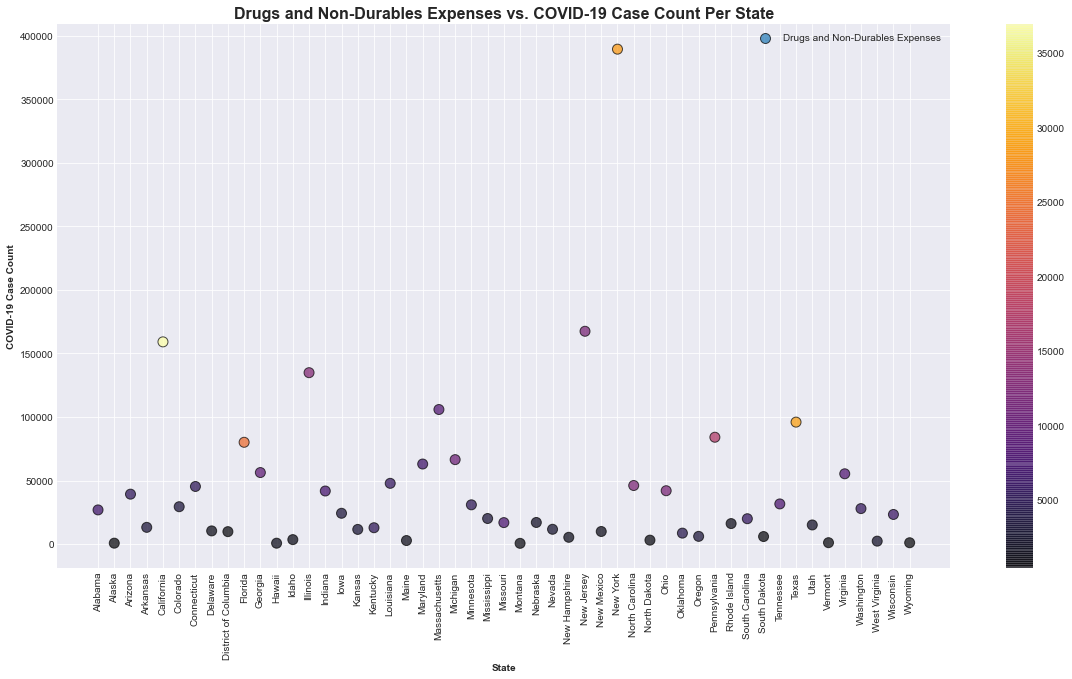

In [53]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Drugs and Non-Durables Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Drugs and Non-Durables Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Drugs and Non-Durables Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

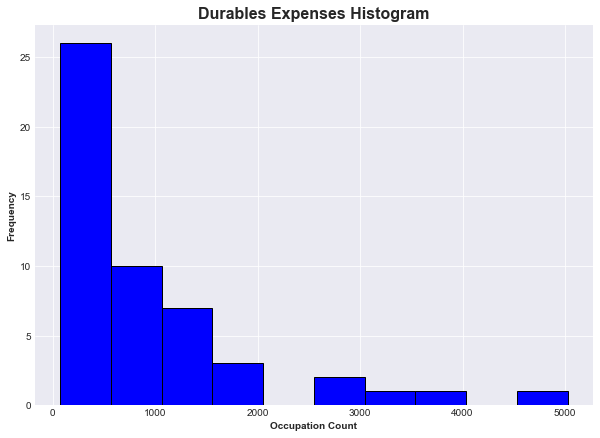

In [54]:
HPSDF['Durables Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Durables Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

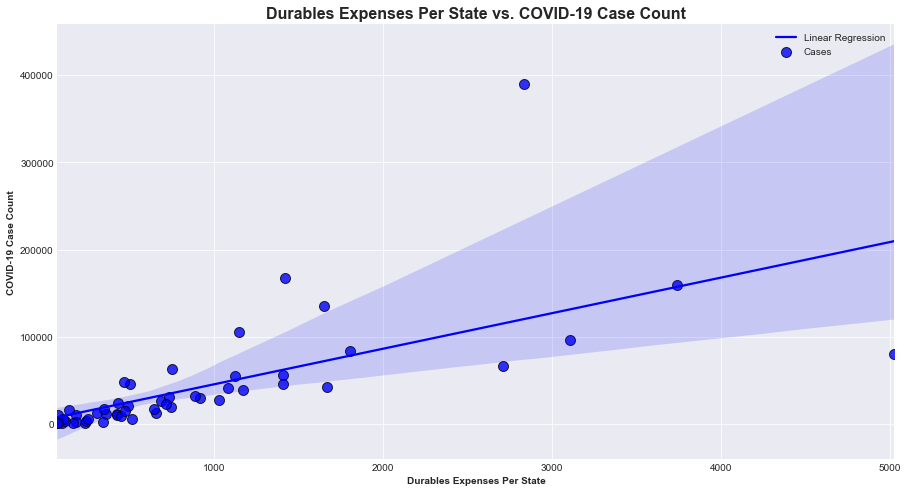

In [55]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Durables Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Durables Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Durables Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [56]:
spearmanr(HPSDF['cases'], HPSDF['Durables Expenses Per State (2014)'])

SpearmanrResult(correlation=0.8996380090497738, pvalue=2.9137831041416485e-19)

In [57]:
model7 = sm.OLS(HPSDF['cases'], HPSDF['Durables Expenses Per State (2014)']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.594
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              73.29
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.28e-11
Time:                        16:20:41   Log-Likelihood:                         -622.26
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1248.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Durables Expenses Per State (2014)    43.1473      5.040      8.561      0.000      33.024      53.270
==============================================================================
Omnibus:                       63.172   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.780
Skew:                           3.007   Prob(JB):                    5.45e-149
Kurtosis:                      19.886   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

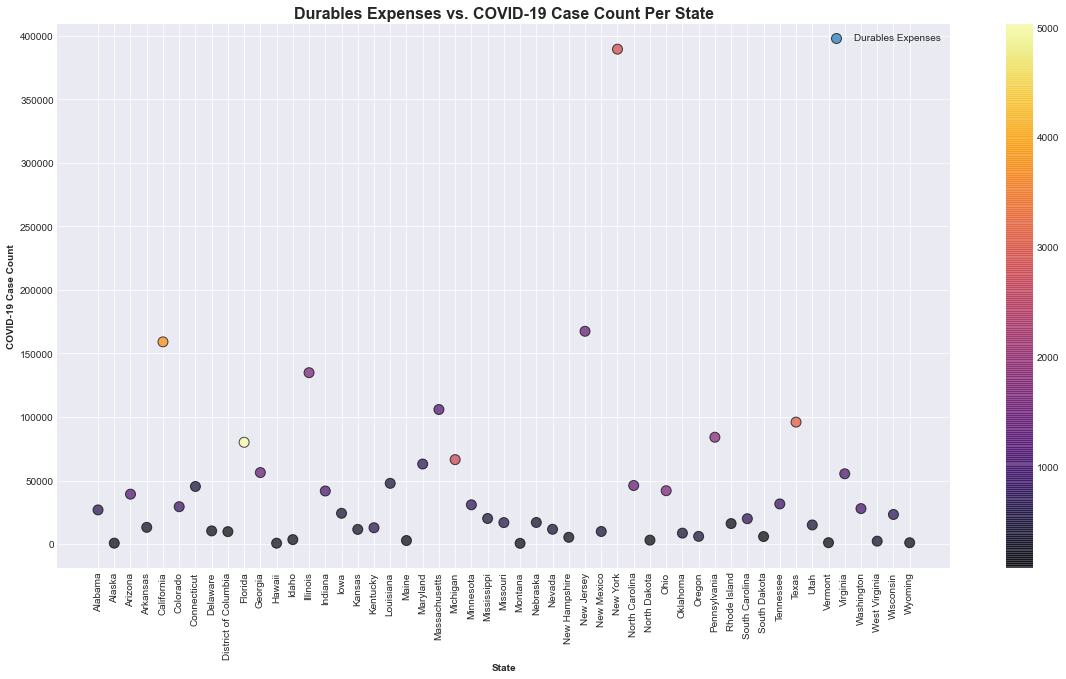

In [58]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Durables Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Durables Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Durables Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

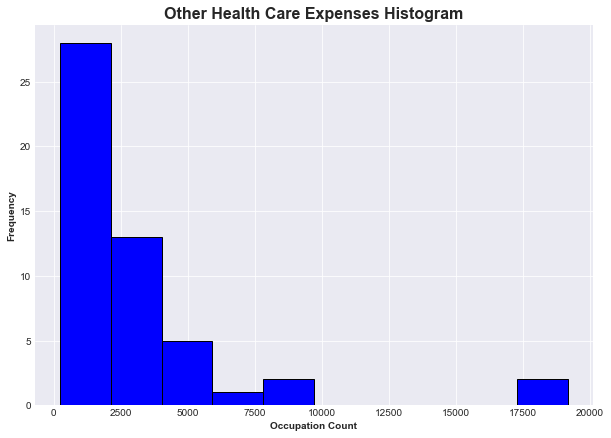

In [59]:
HPSDF['Other Health Care Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Other Health Care Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

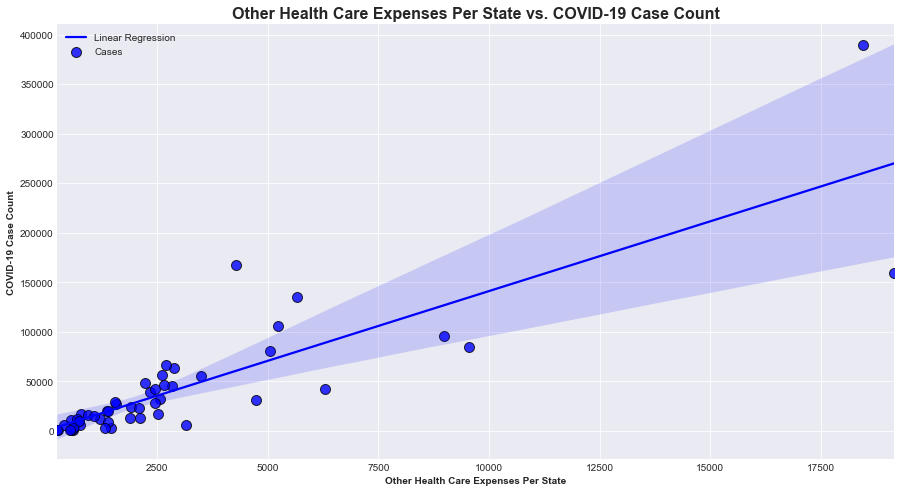

In [60]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Health Care Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Health Care Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Health Care Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [61]:
spearmanr(HPSDF['cases'], HPSDF['Other Health Care Expenses Per State (2014)'])

SpearmanrResult(correlation=0.881447963800905, pvalue=1.3894635954719092e-17)

In [62]:
model8 = sm.OLS(HPSDF['cases'], HPSDF['Other Health Care Expenses Per State (2014)']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              204.6
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.66e-19
Time:                        16:20:42   Log-Likelihood:                         -603.77
No. Observations:                  51   AIC:                                      1210.
Df Residuals:                      50   BIC:                                      1211.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Other Health Care Expenses Per State (2014)    14.1032      0.986     14.302      0.000      12.123      16.084
==============================================================================
Omnibus:                       23.353   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.388
Skew:                           0.963   Prob(JB):                     6.41e-20
Kurtosis:                       9.155   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

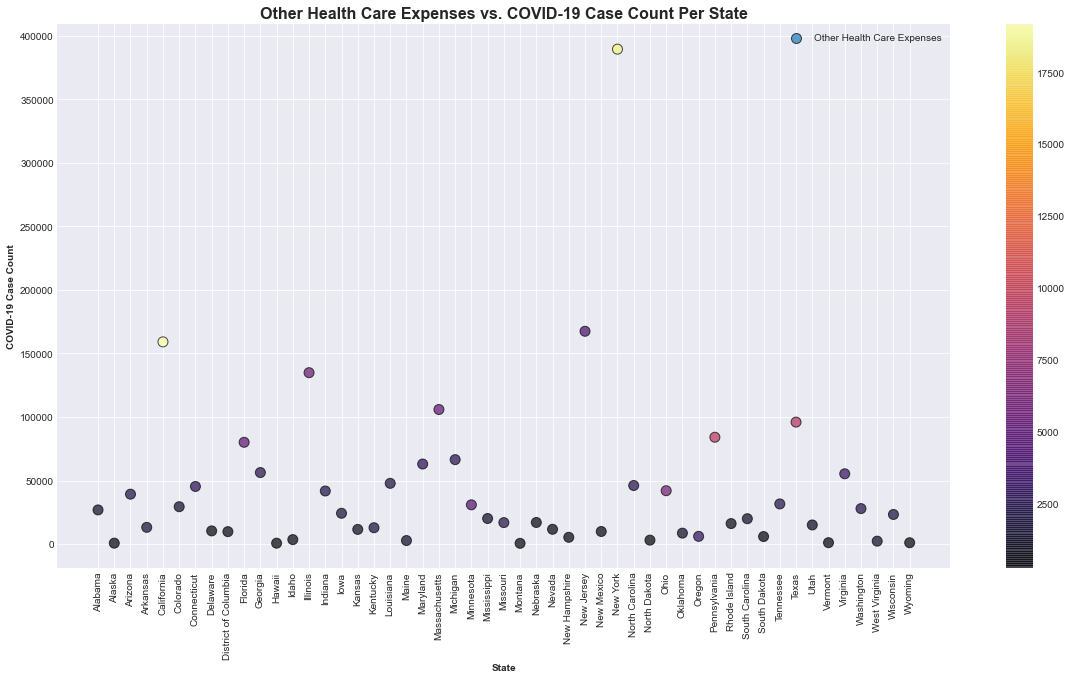

In [63]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Other Health Care Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Other Health Care Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

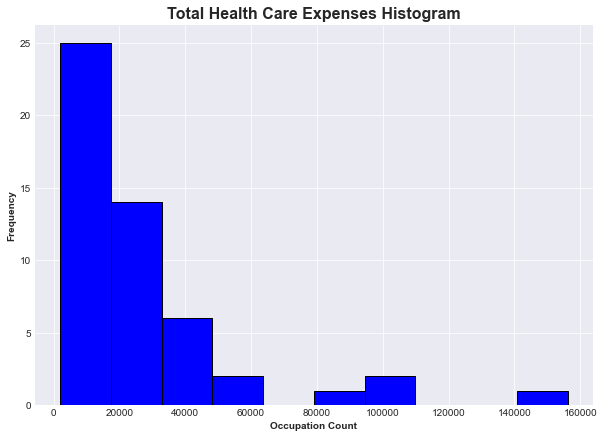

In [64]:
HPSDF['Total Health Care Expenses Per State (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Health Care Expenses Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Occupation Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

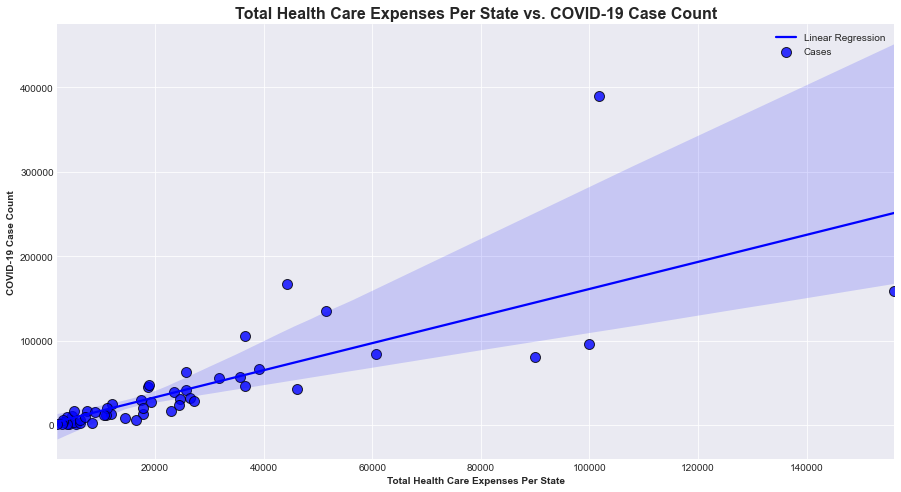

In [65]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Health Care Expenses Per State (2014)', y = 'cases', data = HPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Health Care Expenses Per State vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Care Expenses Per State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [66]:
spearmanr(HPSDF['cases'], HPSDF['Total Health Care Expenses Per State (2014)'])

SpearmanrResult(correlation=0.919185520361991, pvalue=1.8177060005140226e-21)

In [67]:
model9 = sm.OLS(HPSDF['cases'], HPSDF['Total Health Care Expenses Per State (2014)']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              117.7
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    9.67e-15
Time:                        16:20:43   Log-Likelihood:                         -614.42
No. Observations:                  51   AIC:                                      1231.
Df Residuals:                      50   BIC:                                      1233.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Total Health Care Expenses Per State (2014)     1.6150      0.149     10.848      0.000       1.316       1.914
==============================================================================
Omnibus:                       62.724   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.809
Skew:                           3.060   Prob(JB):                    6.90e-130
Kurtosis:                      18.571   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

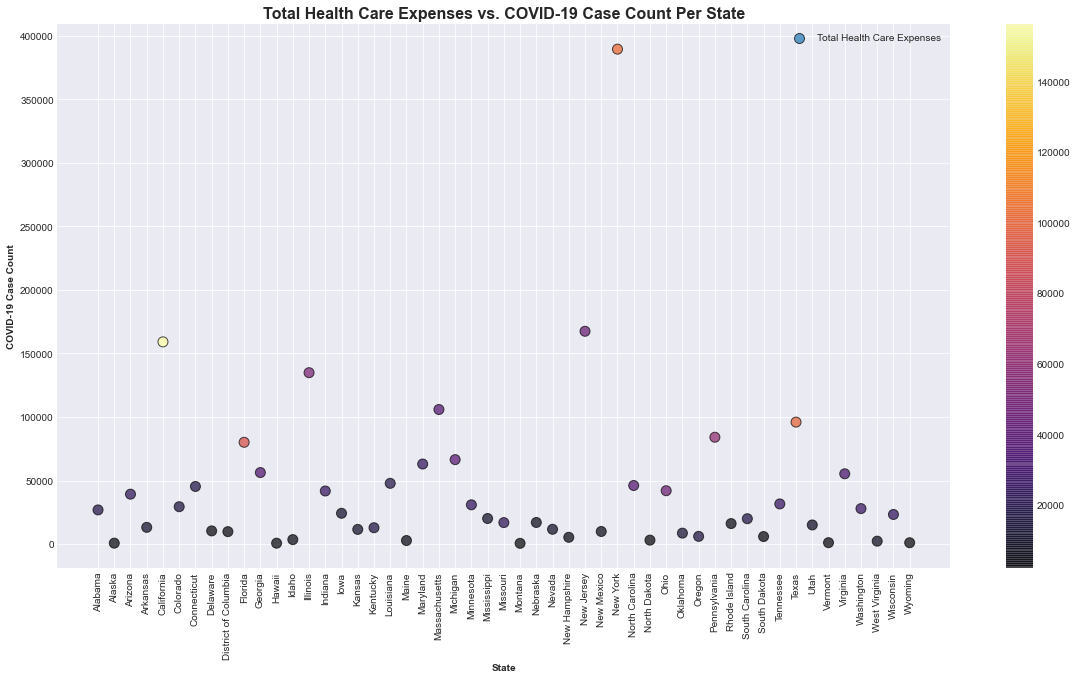

In [68]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSDF['State'] 
y = HPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSDF['Total Health Care Expenses Per State (2014)'], cmap = 'inferno')
plt.title('Total Health Care Expenses vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [69]:
model10 = sm.OLS(HPSDF['cases'], HPSDF[['Personal Health Care Expenses Per State (2014)', 'Hospital Services Expenses Per State (2014)',
                                      'Physician and Clinical Services Expenses Per State (2014)', 'Other Professional Services Expenses Per State (2014)',
                                      'Home Health Care Expenses Per State (2014)', 'Drugs and Non-Durables Expenses Per State (2014)',
                                      'Durables Expenses Per State (2014)', 'Other Health Care Expenses Per State (2014)', 'Total Health Care Expenses Per State (2014)']]).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              51.47
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.54e-19
Time:                        16:20:44   Log-Likelihood:                         -585.13
No. Observations:                  51   AIC:                                      1186.
Df Residuals:                      43   BIC:                                      1202.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State (2014)               -0.0695      6.850     -0.010      0.992     -13.884      13.745
Hospital Services Expenses Per State (2014)                  -2.9581      7.669     -0.386      0.702     -18.424      12.507
Physician and Clinical Services Expenses Per State (2014)   -18.4315      2.688     -6.857      0.000     -23.853     -13.010
Other Professional Services Expenses Per State (2014)        52.6892     14.389      3.662      0.001      23.670      81.708
Home Health Care Expenses Per State (2014)                    2.9611      7.410      0.400      0.691     -11.983      17.905
Drugs and Non-Durables Expenses Per State (2014)             -4.0487      4.136     -0.979      0.333     -12.390       4.293
Durables Expenses Per State (2014)                          -22.4378     14.235     -1.576      0.122     -51.145       6.270
Other Health Care Expenses Per State (2014)                  -0.0155      5.020     -0.003      0.998     -10.139      10.108
Total Health Care Expenses Per State (2014)                  10.7169      7.585      1.413      0.165      -4.581      26.014
==============================================================================
Omnibus:                        5.612   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                7.944
Skew:                          -0.019   Prob(JB):                       0.0188
Kurtosis:                       4.933   Cond. No.                     2.87e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""